<a href="https://colab.research.google.com/github/sanketghosh19/Crypto_Price_Prediction/blob/main/Crypto_LSTM_MetaLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow numpy pandas matplotlib scikit-learn9

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os

# Load Excel file
file_path = '/content/drive/MyDrive/Output.xlsx'
data = pd.read_excel(file_path, sheet_name=None)

# Combine data for all coins
features = ['price', 'volume', 'market_cap']
data_cleaned = {}

# Clean and scale data
for coin, df in data.items():
    df_selected = df[features].dropna()  # Drop rows with NaN values
    if not df_selected.empty:
        scaler = MinMaxScaler()
        df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=features)
        data_cleaned[coin] = df_scaled

print(f"Number of coins with valid data: {len(data_cleaned)}")

Number of coins with valid data: 719


In [ ]:
# Function to create sequences
def create_sequences(data, target_column, sequence_length=5):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data.iloc[i:i + sequence_length].values)
        y.append(data.iloc[i + sequence_length, target_column])
    return np.array(X), np.array(y)

# Select one coin's data for demonstration
example_coin_data = data_cleaned[list(data_cleaned.keys())[0]]
target_column_index = example_coin_data.columns.get_loc('price')

# Create sequences
sequence_length = 5
X, y = create_sequences(example_coin_data, target_column=target_column_index, sequence_length=sequence_length)

print("Input shape:", X.shape)
print("Output shape:", y.shape)

Input shape: (23, 5, 3)
Output shape: (23,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))  # Predict next day's price
    model.compile(optimizer='adam', loss='mse')
    return model

# Model input shape: (sequence_length, num_features)
input_shape = (sequence_length, X.shape[2])
model = build_lstm_model(input_shape)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,851 (42.39 KB)

 Trainable params: 10,851 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Split data into training and testing
split = int(0.8 * len(X))  # 80% for training, 20% for testing
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 463ms/step - loss: 0.0499 - val_loss: 0.7767
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0413 - val_loss: 0.7324
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0401 - val_loss: 0.6908
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0353 - val_loss: 0.6499
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0306 - val_loss: 0.6088
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0287 - val_loss: 0.5685
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0263 - val_loss: 0.5304
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0227 - val_loss: 0.4935
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0204 - val_loss: 0.4570
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0185 - val_loss: 0.4230
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0149 - val_loss: 0.3909
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0147 - val_loss: 0.3586


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


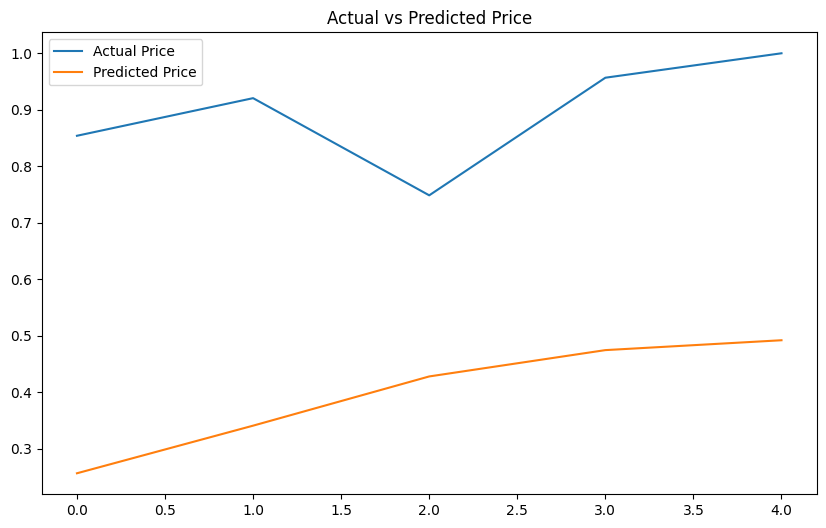

In [ ]:
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.legend()
plt.title("Actual vs Predicted Price")
plt.show()

In [ ]:
# Fine-tune for a new coin
new_coin_data = data_cleaned[list(data_cleaned.keys())[1]]
X_new, y_new = create_sequences(new_coin_data, target_column=target_column_index, sequence_length=sequence_length)

# Fine-tune the model
model.fit(X_new, y_new, epochs=10, batch_size=16)

# Predict future prices
future_predictions = model.predict(X_new[-3:])
print("Predicted prices for next 3 days:", future_predictions.flatten())

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0106
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0105
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0104
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0103
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0103
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0102
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0101
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0100
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0099
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0098
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Predicted prices for next 3 days: [0.1404792  0.16554335 0.19129935]


In [ ]:
results = {}
for coin, df in data_cleaned.items():
    X_coin, y_coin = create_sequences(df, target_column=target_column_index, sequence_length=sequence_length)

    # Check if enough data for training
    if len(X_coin) > 0 and len(y_coin) > 0: #Checks if X_coin and y_coin are not empty
        split = int(0.8 * len(X_coin))
        X_train, X_test = X_coin[:split], X_coin[split:]
        y_train, y_test = y_coin[:split], y_coin[split:]

        # Train a model for each coin
        model = build_lstm_model(input_shape)
        model.fit(X_train, y_train, epochs=30, verbose=0)
        y_pred = model.predict(X_test)

        # Store the results
        results[coin] = {"y_test": y_test, "y_pred": y_pred}
    else:
        print(f"Skipping {coin} due to insufficient data.")

# Example output
print("Predicted vs Actual for one coin:")
coin_name = list(results.keys())[0] # Get the first available coin after filtering
print("Actual:", results[coin_name]["y_test"][:5])
print("Predicted:", results[coin_name]["y_pred"][:5].flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
Skipping alchemistai due to insufficient data.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Skipping bananaforscale2 due to insufficient data.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Skipping biaoonsol due to insufficient data.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━

In [ ]:
# Function to predict future prices for any coin
def predict_future_prices(coin_name, days_to_predict, model, data_cleaned, sequence_length=5):
    """
    Predict future prices for a specified coin and period.

    Parameters:
        coin_name (str): Name of the meme coin.
        days_to_predict (int): Number of future days to predict.
        model (tf.keras.Model): Trained LSTM model.
        data_cleaned (dict): Dictionary containing scaled data of all coins.
        sequence_length (int): Number of time steps for input sequence.

    Returns:
        list: Predicted prices for the next 'days_to_predict' days.
    """
    if coin_name not in data_cleaned:
        print(f"Coin '{coin_name}' not found in the dataset!")
        return []

    # Retrieve the coin's scaled data
    coin_data = data_cleaned[coin_name]
    input_sequence = coin_data[-sequence_length:].values  # Take the last 'sequence_length' rows
    input_sequence = input_sequence.reshape(1, sequence_length, -1)  # Reshape for LSTM input

    predictions = []
    for _ in range(days_to_predict):
        # Predict next day's price
        predicted_price = model.predict(input_sequence, verbose=0)[0][0]
        predictions.append(predicted_price)

        # Update input sequence: Append prediction and remove the oldest step
        new_step = input_sequence[0, -1, :].copy()
        new_step[0] = predicted_price  # Update the 'price' feature
        input_sequence = np.append(input_sequence[:, 1:, :], [[new_step]], axis=1)

    return predictions

# Example usage
coin_name = input("Enter the coin name (e.g., 1GUY): ")
days_to_predict = int(input("Enter the number of days to predict: "))

# Build and train the model (ensure model is trained beforehand)
model = build_lstm_model(input_shape)
model.fit(X_train, y_train, epochs=30, verbose=0)

# Predict future prices
future_prices = predict_future_prices(coin_name, days_to_predict, model, data_cleaned)
print(f"Predicted prices for the next {days_to_predict} days: {future_prices}")

Enter the coin name (e.g., 1GUY): 1guy
Enter the number of days to predict: 3
Predicted prices for the next 3 days: [0.5422202, 0.5188515, 0.4900408]


In [ ]:
# Select features for training
features = ['price', 'volume', 'market_cap', 'market_cap_rank', 'twitter_sentiments']

# Clean and scale data
from sklearn.preprocessing import MinMaxScaler

data_cleaned = {}
scalers = {}

for coin, df in data.items():
    df_selected = df[features].dropna()  # Drop rows with missing values
    if not df_selected.empty:
        scaler = MinMaxScaler()
        df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=features)
        data_cleaned[coin] = df_scaled
        scalers[coin] = scaler  # Save scalers for later use


In [ ]:
def create_sequences(data, target_column, sequence_length=5):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data.iloc[i:i + sequence_length].values)
        y.append(data.iloc[i + sequence_length, target_column])
    return np.array(X), np.array(y)

# Prepare data for all coins
sequence_length = 5
all_X, all_y = [], []

for coin, df in data_cleaned.items():
    target_column_index = df.columns.get_loc('price')  # Predict 'price'
    X, y = create_sequences(df, target_column=target_column_index, sequence_length=sequence_length)

    # Check if X has the expected dimensions before appending
    if X.ndim == 3:  # Ensure X has 3 dimensions
        all_X.append(X)
        all_y.append(y)
    else:
        print(f"Skipping {coin} due to insufficient data for sequence creation.")

# Combine data from all coins
# Check if all_X is not empty before stacking
if all_X:
    X_combined = np.vstack(all_X)
    y_combined = np.hstack(all_y)
    print("Combined data shape:", X_combined.shape, y_combined.shape)
else:
    print("No coins had sufficient data to create sequences.")

Skipping alchemistai due to insufficient data for sequence creation.
Skipping autism2 due to insufficient data for sequence creation.
Skipping babygrok due to insufficient data for sequence creation.
Skipping babyshironeko due to insufficient data for sequence creation.
Skipping bananaforscale due to insufficient data for sequence creation.
Skipping bananaforscale2 due to insufficient data for sequence creation.
Skipping biaoonsol due to insufficient data for sequence creation.
Skipping brettmemecoin due to insufficient data for sequence creation.
Skipping chillgirl due to insufficient data for sequence creation.
Skipping chudjak due to insufficient data for sequence creation.
Skipping cryptoczar due to insufficient data for sequence creation.
Skipping departmentofgovernmentefficienc due to insufficient data for sequence creation.
Skipping dogc due to insufficient data for sequence creation.
Skipping dogefather2 due to insufficient data for sequence creation.
Skipping elonspetsnail due

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
def build_improved_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))  # Prevent overfitting
    model.add(LSTM(32))
    model.add(Dropout(0.3))
    model.add(Dense(1))  # Predict price
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Split data into training and testing
split = int(0.8 * len(X_combined))
X_train, X_test = X_combined[:split], X_combined[split:]
y_train, y_test = y_combined[:split], y_combined[split:]

# Train the model
input_shape = (sequence_length, len(features))
model = build_improved_lstm(input_shape)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0656 - mae: 0.1910 - val_loss: 0.0319 - val_mae: 0.1320
Epoch 2/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0305 - mae: 0.1246 - val_loss: 0.0277 - val_mae: 0.1103
Epoch 3/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0286 - mae: 0.1185 - val_loss: 0.0273 - val_mae: 0.1073
Epoch 4/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0291 - mae: 0.1182 - val_loss: 0.0268 - val_mae: 0.1100
Epoch 5/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0281 - mae: 0.1162 - val_loss: 0.0269 - val_mae: 0.1126
Epoch 6/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0287 - mae: 0.1163 - val_loss: 0.0275 - val_mae: 0.1144
Epoch 7/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0271 - mae: 0.1146 - val_loss: 0.0279 - val_mae: 0.1058
Epoch 8/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0280 - mae: 0.1141 - val_loss: 0.0269 - val_mae: 0.1129
Epoch 9/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step -

In [ ]:
def predict_future_prices(coin_name, days_to_predict, model, data_cleaned, scalers, sequence_length=5):
    scaler = scalers[coin_name]
    coin_data = data_cleaned[coin_name]
    input_sequence = coin_data[-sequence_length:].values.reshape(1, sequence_length, -1)

    predictions = []
    for _ in range(days_to_predict):
        predicted_price = model.predict(input_sequence, verbose=0)[0][0]
        predictions.append(predicted_price)

        # Update input sequence with the predicted price
        new_step = input_sequence[0, -1, :].copy()
        new_step[0] = predicted_price  # Update 'price'
        input_sequence = np.append(input_sequence[:, 1:, :], [[new_step]], axis=1)

    # Inverse transform to original scale
    predicted_prices = scaler.inverse_transform([[p, 0, 0, 0, 0] for p in predictions])[:, 0]
    return predicted_prices

# Predict prices for a specific coin
coin_name = "tema"
days_to_predict = 3
future_prices = predict_future_prices(coin_name, days_to_predict, model, data_cleaned, scalers)

print(f"Predicted prices for the next {days_to_predict} days:", future_prices)

Predicted prices for the next 3 days: [0.00418382 0.00397184 0.004177  ]


In [ ]:
from sklearn.metrics import r2_score

# Evaluate model accuracy on the test set
y_pred = model.predict(X_test)

# Compute R2 Score
r2 = r2_score(y_test, y_pred)
accuracy_percentage = r2 * 100

print(f"R² Score: {r2:.4f}")
print(f"Accuracy: {accuracy_percentage:.2f}%")

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R² Score: 0.6954
Accuracy: 69.54%
